C:\Users\syssa\AppData\Local\Temp\ipykernel_25144\1931730121.py:15: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  data['time'] = pd.date_range(start='1949-01-01', periods=len(data), freq='M')
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


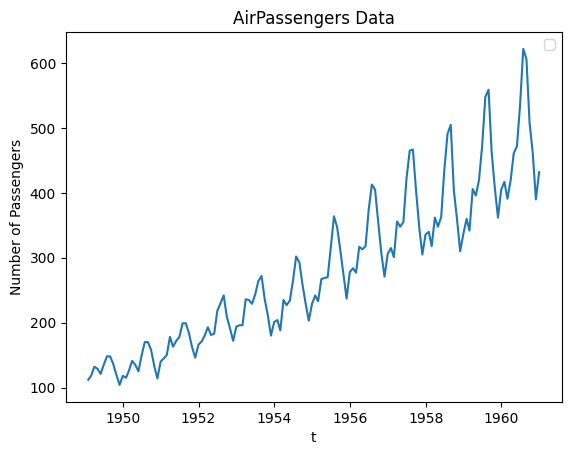

C:\Users\syssa\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
C:\Users\syssa\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
C:\Users\syssa\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
C:\Users\syssa\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\sy

                               SARIMAX Results                                
Dep. Variable:                  value   No. Observations:                  144
Model:                ARIMA(12, 1, 0)   Log Likelihood                -565.239
Date:                Wed, 30 Oct 2024   AIC                           1156.477
Time:                        23:43:15   BIC                           1194.994
Sample:                    01-31-1949   HQIC                          1172.128
                         - 12-31-1960                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0064      0.050     -0.128      0.898      -0.105       0.092
ar.L2         -0.0824      0.060     -1.383      0.167      -0.199       0.034
ar.L3         -0.0493      0.044     -1.113      0.2

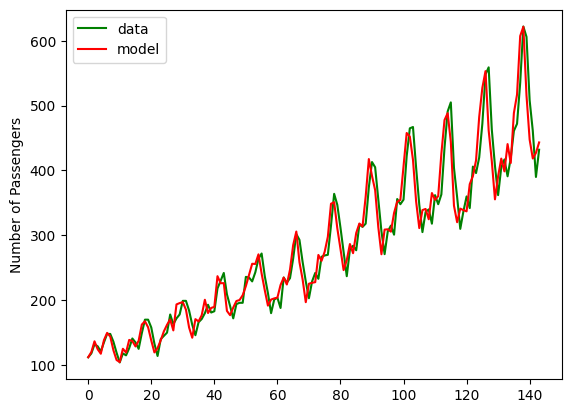

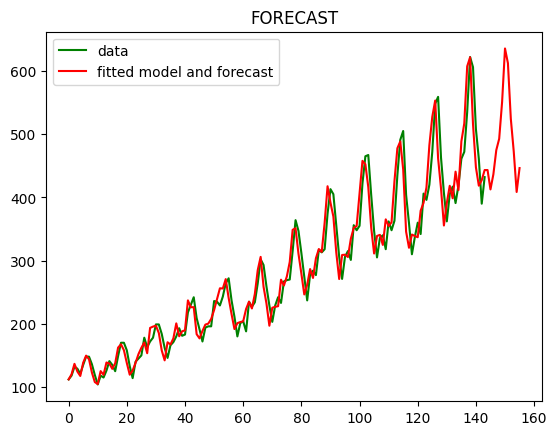

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.datasets import get_rdataset

#Datset

data = get_rdataset("AirPassengers").data
data['time'] = pd.date_range(start='1949-01-01', periods=len(data), freq='M')
data.set_index('time', inplace=True)

plt.figure()
plt.plot(data)
plt.title('AirPassengers Data')
plt.xlabel('t')
plt.ylabel('Number of Passengers')
plt.legend()
plt.show()

model = ARIMA(data, order=(12,1,0))  #ARIMA(p,d,q)
fit = model.fit()

print(fit.summary())

# Step 3: Make predictions for the fitted model
fitted_values = fit.predict(start=1, end=len(data))

# Make future predictions
n_forecast = 12  # Number of periods to forecast
forecast = fit.forecast(steps=n_forecast)
forecast_index = np.arange(len(data), len(data) + n_forecast)
forecast_array = forecast.values.flatten()

plt.figure()
plt.plot(data.values.flatten(),color = 'green')
plt.plot(fitted_values.values.flatten(), label='Fitted Values', color='red')
plt.ylabel('Number of Passengers')
plt.legend(['data','model'])
plt.show()

RawData = data.values.flatten()
RawFittedValues = fitted_values.values.flatten()
m = len(forecast_array)
nan_array = np.full(m, np.nan)
RawData = np.append(RawData,nan_array)
RawFittedValues = np.append(RawFittedValues,forecast_array)

plt.figure()
plt.plot(RawData,color='green')
plt.plot(RawFittedValues,color='red')
plt.title('FORECAST')
plt.legend(['data','fitted model and forecast'])
plt.show()
